In [1]:
import pandas as pd
import numpy as np
import kaplanmeier as km
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns

In [2]:
samples = pd.read_csv('ns.csv')

print(len(samples))

2560


In [3]:
samples.head()

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,histologicalDiagnosis.id,histologicalDiagnosis.label,icdoMorphology.id,icdoMorphology.label,...,provenance.populations.0.type.label,provenance.populations.1.confidence,provenance.populations.1.description,provenance.populations.1.type.id,provenance.populations.1.type.label,info.cellLine,info.samplesource,info.seer,projectId,sex
0,5bab56c2727983b2e00abf78,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Ependymoma [4th ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
1,5bab56c3727983b2e00ac462,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [Left cerebral],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,5bab56c3727983b2e00ac463,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
3,5bab56c3727983b2e00ac464,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
4,5bab56c3727983b2e00ac465,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F


In [4]:
for col in samples.columns:
    print(col)

_id
cohorts.0.id
cohorts.0.label
dataUseConditions.id
dataUseConditions.label
description
histologicalDiagnosis.id
histologicalDiagnosis.label
icdoMorphology.id
icdoMorphology.label
icdoTopography.id
icdoTopography.label
id
individualAgeAtCollection
individualId
info.callsetIds.0
info.cnvstatistics.cnvcoverage
info.cnvstatistics.cnvfraction
info.cnvstatistics.delcoverage
info.cnvstatistics.delfraction
info.cnvstatistics.dupcoverage
info.cnvstatistics.dupfraction
info.legacyId.0
pathologicalStage
provenance.geoLocation.geometry.coordinates.0
provenance.geoLocation.geometry.coordinates.1
provenance.geoLocation.geometry.type
provenance.geoLocation.properties.ISO3166alpha3
provenance.geoLocation.properties.city
provenance.geoLocation.properties.country
provenance.geoLocation.properties.label
provenance.geoLocation.properties.latitude
provenance.geoLocation.properties.longitude
provenance.geoLocation.properties.precision
provenance.geoLocation.type
provenance.material.id
provenance.material

In [5]:
samples[samples.isna().all(axis=1)]

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,histologicalDiagnosis.id,histologicalDiagnosis.label,icdoMorphology.id,icdoMorphology.label,...,provenance.populations.0.type.label,provenance.populations.1.confidence,provenance.populations.1.description,provenance.populations.1.type.id,provenance.populations.1.type.label,info.cellLine,info.samplesource,info.seer,projectId,sex


In [6]:
cdkn2a = pd.read_csv('cdkn2a_biosample.tsv', sep='\t')
erbb2 = pd.read_csv('erbb2_biosample.tsv', sep='\t')
myc = pd.read_csv('myc_biosample.tsv', sep='\t')
tp53 = pd.read_csv('tp53_biosample.tsv', sep='\t')

In [7]:
tp53.head()

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label
0,pgxbs-kftva59y,NaN,NaN,pgxind-kftx25eh,pgxcs-kftvldsu,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva5a2,NaN,NaN,pgxind-kftx25em,pgxcs-kftvldtu,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva5a4,NaN,NaN,pgxind-kftx25en,pgxcs-kftvldud,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pgxbs-kftva5ac,NaN,NaN,pgxind-kftx25ex,pgxcs-kftvldwr,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pgxbs-kftva5ah,NaN,NaN,pgxind-kftx25f3,pgxcs-kftvldy7,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for col in tp53.columns:
    print(col)

biosample_id
group_id
group_label
individual_id
callset_ids
external_references_id___PMID
external_references_label___PMID
external_references_id___arrayexpress
external_references_label___arrayexpress
external_references_id___cbioportal
external_references_label___cbioportal
external_references_id___cellosaurus
external_references_label___cellosaurus
legacy_ids
notes
histological_diagnosis_id
histological_diagnosis_label
icdo_morphology_id
icdo_morphology_label
icdo_topography_id
icdo_topography_label
pathological_stage_id
pathological_stage_label
biosample_status_id
biosample_status_label
sampled_tissue_id
sampled_tissue_label
tnm
stage
grade
age_iso
sex_id
sex_label
followup_state_id
followup_state_label
followup_time
geoprov_city
geoprov_country
geoprov_iso_alpha3
geoprov_long_lat
cnv_fraction
cnv_del_fraction
cnv_dup_fraction
cell_line
experiment_id
series_id
platform_id
cell_line_id
cell_line_label


In [9]:
tp53[tp53.isna().all(axis=1)]

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label


In [10]:
myc.head()

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label
0,pgxbs-kftva5a1,NaN,NaN,pgxind-kftx25ek,pgxcs-kftvldtc,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva5ab,NaN,NaN,pgxind-kftx25ev,pgxcs-kftvldwa,NaN,NaN,NaN,NaN,NaN,...,30.7::36.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva5de,NaN,NaN,pgxind-kftx25io,pgxcs-kftvlet0,PMID:9950502,NaN,NaN,NaN,NaN,...,-122.42::37.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pgxbs-kftva5dq,NaN,NaN,pgxind-kftx25j3,pgxcs-kftvlewg,PMID:9950502,NaN,NaN,NaN,NaN,...,-122.42::37.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pgxbs-kftva5e9,NaN,NaN,pgxind-kftx25jr,pgxcs-kftvlf4a,PMID:9950502,NaN,NaN,NaN,NaN,...,-122.42::37.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
myc[myc.isna().all(axis=1)]

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label


In [12]:
tumor_ids = list(samples['individualId'])
tumor_ids[0:10]

['pgxind-kftx2ejj',
 'pgxind-kftx2gil',
 'pgxind-kftx2gin',
 'pgxind-kftx2gip',
 'pgxind-kftx2gir',
 'pgxind-kftx2git',
 'pgxind-kftx2giv',
 'pgxind-kftx2giz',
 'pgxind-kftx2gj1',
 'pgxind-kftx2gj3']

In [13]:
cdkn2a_ids = list(cdkn2a['individual_id'])
erbb2_ids = list(erbb2['individual_id'])
myc_ids = list(myc['individual_id'])
tp53_ids = list(tp53['individual_id'])

In [14]:
cdkn2a_ids[0:10]

['pgxind-kftx266l',
 'pgxind-kftx266t',
 'pgxind-kftx266v',
 'pgxind-kftx266z',
 'pgxind-kftx2671',
 'pgxind-kftx2675',
 'pgxind-kftx26j0',
 'pgxind-kftx274e',
 'pgxind-kftx274m',
 'pgxind-kftx274q']

In [15]:
# Create a new DataFrame with selected columns
columns_to_select = [
    'individualId', 'info.death', 'info.followupMonths', 'sex',
    'histologicalDiagnosis.id', 'histologicalDiagnosis.label',
    'info.cnvstatistics.cnvfraction', 'info.cnvstatistics.cnvcoverage',
    'provenance.geoLocation.properties.ISO3166alpha3', 'individualAgeAtCollection'
]
final_data = samples[columns_to_select].copy()
final_data

,individualId,info.death,info.followupMonths,sex,histologicalDiagnosis.id,histologicalDiagnosis.label,info.cnvstatistics.cnvfraction,info.cnvstatistics.cnvcoverage,provenance.geoLocation.properties.ISO3166alpha3,individualAgeAtCollection
0,pgxind-kftx2ejj,0,32.0,F,NCIT:C3017,Ependymoma,0.076,2.186174e+08,PRT,P1Y
1,pgxind-kftx2gil,0,24.0,M,NCIT:C3017,Ependymoma,0.000,0.000000e+00,FRA,P5Y
2,pgxind-kftx2gin,0,10.0,F,NCIT:C3017,Ependymoma,0.272,7.832260e+08,FRA,P33Y
3,pgxind-kftx2gip,0,3.0,M,NCIT:C3017,Ependymoma,0.765,2.200655e+09,FRA,P17Y
4,pgxind-kftx2gir,0,19.0,F,NCIT:C3017,Ependymoma,0.667,1.916798e+09,FRA,P32Y
...,...,...,...,...,...,...,...,...,...,...
2555,pgxind-kftx2btr,1,10.0,F,NCIT:C9344,Pineoblastoma,0.134,3.857168e+08,GBR,P1Y
2556,pgxind-kftx2btt,1,20.0,M,NCIT:C9344,Pineoblastoma,0.086,2.468712e+08,GBR,P1Y
2557,pgxind-kftx3ajf,1,5.0,F,NCIT:C9344,Pineoblastoma,0.127,3.640158e+08,DEU,P46Y
2558,pgxind-kftx3ajh,1,33.0,M,NCIT:C9344,Pineoblastoma,0.130,3.723952e+08,DEU,P1Y


In [16]:

# Initialize 'cdkn2a', 'erbb2', 'myc', 'tp53', and 'other' columns with zeros
final_data['cdkn2a'] = 0
final_data['erbb2'] = 0
final_data['myc'] = 0
final_data['tp53'] = 0
final_data['other'] = 0

# Use boolean indexing to set values in the 'cdkn2a', 'erbb2', 'myc', 'tp53' columns
final_data.loc[final_data['individualId'].isin(cdkn2a['individual_id']), 'cdkn2a'] = 1
final_data.loc[final_data['individualId'].isin(erbb2['individual_id']), 'erbb2'] = 1
final_data.loc[final_data['individualId'].isin(myc['individual_id']), 'myc'] = 1
final_data.loc[final_data['individualId'].isin(tp53['individual_id']), 'tp53'] = 1

# Calculate the 'other' column based on the absence of 'cdkn2a', 'erbb2', 'myc', and 'tp53'
final_data['other'] = 1 - (final_data['cdkn2a'] | final_data['erbb2'] | final_data['myc'] | final_data['tp53'])

final_data

,individualId,info.death,info.followupMonths,sex,histologicalDiagnosis.id,histologicalDiagnosis.label,info.cnvstatistics.cnvfraction,info.cnvstatistics.cnvcoverage,provenance.geoLocation.properties.ISO3166alpha3,individualAgeAtCollection,cdkn2a,erbb2,myc,tp53,other
0,pgxind-kftx2ejj,0,32.0,F,NCIT:C3017,Ependymoma,0.076,2.186174e+08,PRT,P1Y,1,0,0,0,0
1,pgxind-kftx2gil,0,24.0,M,NCIT:C3017,Ependymoma,0.000,0.000000e+00,FRA,P5Y,0,0,0,0,1
2,pgxind-kftx2gin,0,10.0,F,NCIT:C3017,Ependymoma,0.272,7.832260e+08,FRA,P33Y,0,0,0,0,1
3,pgxind-kftx2gip,0,3.0,M,NCIT:C3017,Ependymoma,0.765,2.200655e+09,FRA,P17Y,0,0,0,0,1
4,pgxind-kftx2gir,0,19.0,F,NCIT:C3017,Ependymoma,0.667,1.916798e+09,FRA,P32Y,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,pgxind-kftx2btr,1,10.0,F,NCIT:C9344,Pineoblastoma,0.134,3.857168e+08,GBR,P1Y,0,0,0,0,1
2556,pgxind-kftx2btt,1,20.0,M,NCIT:C9344,Pineoblastoma,0.086,2.468712e+08,GBR,P1Y,0,0,0,0,1
2557,pgxind-kftx3ajf,1,5.0,F,NCIT:C9344,Pineoblastoma,0.127,3.640158e+08,DEU,P46Y,1,0,0,0,0
2558,pgxind-kftx3ajh,1,33.0,M,NCIT:C9344,Pineoblastoma,0.130,3.723952e+08,DEU,P1Y,0,0,0,0,1


In [17]:
final_data.to_csv('ns_final.csv', index=False)

In [18]:
value_counts = final_data['histologicalDiagnosis.label'].value_counts()
value_counts

Glioblastoma                                                       706
Neuroblastoma                                                      521
Medulloblastoma                                                    424
Ependymoma                                                         164
Desmoplastic/Nodular Medulloblastoma                                97
Large Cell Medulloblastoma                                          74
Primitive Neuroectodermal Tumor                                     61
Astrocytoma                                                         56
Malignant Glioma                                                    52
Central Nervous System Embryonal Tumor, Not Otherwise Specified     52
Mixed Glioma                                                        48
Retinoblastoma                                                      46
Malignant Peripheral Nerve Sheath Tumor                             46
Oligodendroglioma                                                   35
Atypic

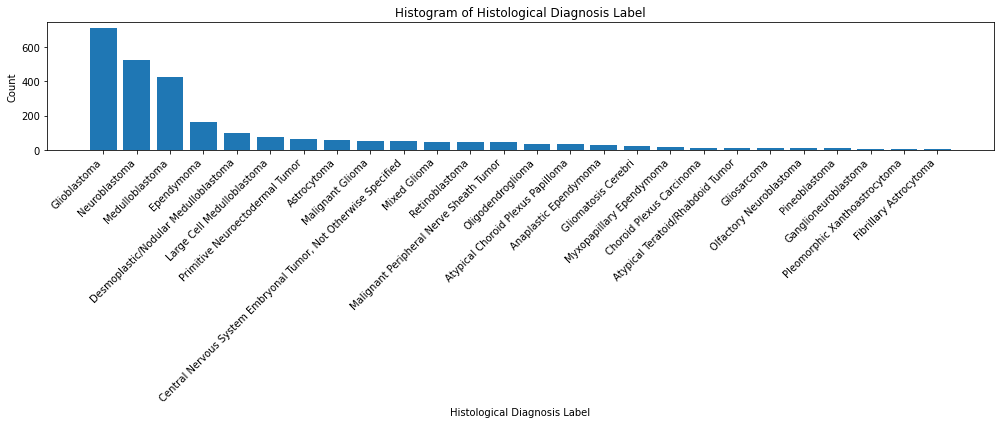

In [19]:
# Create a histogram with increased spacing between bars
plt.figure(figsize=(14, 6))  # Increase the figure width for better spacing
bar_width = 0.8  # Adjust the width of the bars
plt.bar(value_counts.index, value_counts.values, width=bar_width)
plt.xlabel('Histological Diagnosis Label')
plt.ylabel('Count')
plt.title('Histogram of Histological Diagnosis Label')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Show the histogram
plt.tight_layout()
plt.show()


In [20]:
final_data['individualAgeAtCollection'].value_counts()

P3Y        51
P11Y       46
P8Y        44
P6Y        43
P5Y        42
           ..
P4Y3M       1
P8Y9M       1
P73Y5M      1
P23Y10M     1
P9Y1M       1
Name: individualAgeAtCollection, Length: 291, dtype: int64

In [21]:
value_counts = final_data['histologicalDiagnosis.id'].value_counts()
value_counts

NCIT:C3058     706
NCIT:C3270     521
NCIT:C3222     424
NCIT:C3017     164
NCIT:C4956      97
NCIT:C6904      74
NCIT:C3716      61
NCIT:C60781     56
NCIT:C4822      52
NCIT:C5398      52
NCIT:C3903      48
NCIT:C7541      46
NCIT:C3798      46
NCIT:C3288      35
NCIT:C53686     32
NCIT:C4049      30
NCIT:C4318      23
NCIT:C3697      18
NCIT:C4715      13
NCIT:C6906      13
NCIT:C3796      12
NCIT:C3789      12
NCIT:C9344      10
NCIT:C3790       7
NCIT:C4323       4
NCIT:C4322       4
Name: histologicalDiagnosis.id, dtype: int64

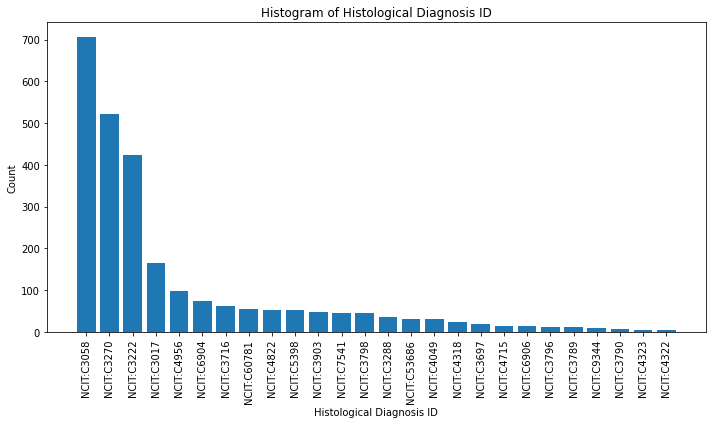

In [22]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Histological Diagnosis ID')
plt.ylabel('Count')
plt.title('Histogram of Histological Diagnosis ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

# List of gene groups and their corresponding files
gene_groups = [
    ('tp53', 'tp53_biosample.tsv'),
    ('cdkn2a', 'cdkn2a_biosample.tsv'),
    ('myc', 'myc_biosample.tsv'),
    ('erbb2', 'erbb2_biosample.tsv')
]

# Read the tumor dataset
dataset = pd.read_csv('ns.csv')

# Initialize an empty list to store individual gene group DataFrames
gene_group_datasets = []

# Process each gene group
for group_name, file_name in gene_groups:
    # Read the gene group information
    group_info = pd.read_csv(file_name, sep='\t')
    
    # Merge the dataset with the gene group information
    merged_dataset = pd.merge(dataset, group_info, left_on='id', right_on='biosample_id')
    
    # Add a 'group' column
    merged_dataset['group'] = group_name
    
    # Append the merged dataset to the list
    gene_group_datasets.append(merged_dataset)

# Combine all gene group datasets into a single DataFrame
whole_dataset = pd.concat(gene_group_datasets)

# Select columns of interest
selected_columns = ['info.followupMonths', 'info.death', 'group', 'histologicalDiagnosis.id', 'info.cnvstatistics.cnvfraction', 'sex', 'histologicalDiagnosis.label']
whole_dataset = whole_dataset[selected_columns]

# Drop rows with missing values
whole_dataset = whole_dataset.dropna()

# Display information about the resulting DataFrame
whole_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 698
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   info.followupMonths             1325 non-null   float64
 1   info.death                      1325 non-null   int64  
 2   group                           1325 non-null   object 
 3   histologicalDiagnosis.id        1325 non-null   object 
 4   info.cnvstatistics.cnvfraction  1325 non-null   float64
 5   sex                             1325 non-null   object 
 6   histologicalDiagnosis.label     1325 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 82.8+ KB


In [24]:
whole_dataset.head()

,info.followupMonths,info.death,group,histologicalDiagnosis.id,info.cnvstatistics.cnvfraction,sex,histologicalDiagnosis.label
0,19.0,0,tp53,NCIT:C3017,0.667,F,Ependymoma
1,18.0,0,tp53,NCIT:C3017,0.541,F,Ependymoma
2,11.0,0,tp53,NCIT:C3017,0.565,M,Ependymoma
3,85.0,0,tp53,NCIT:C3017,0.857,M,Ependymoma
4,10.0,0,tp53,NCIT:C3017,0.387,F,Ependymoma


<Figure size 1080x720 with 0 Axes>

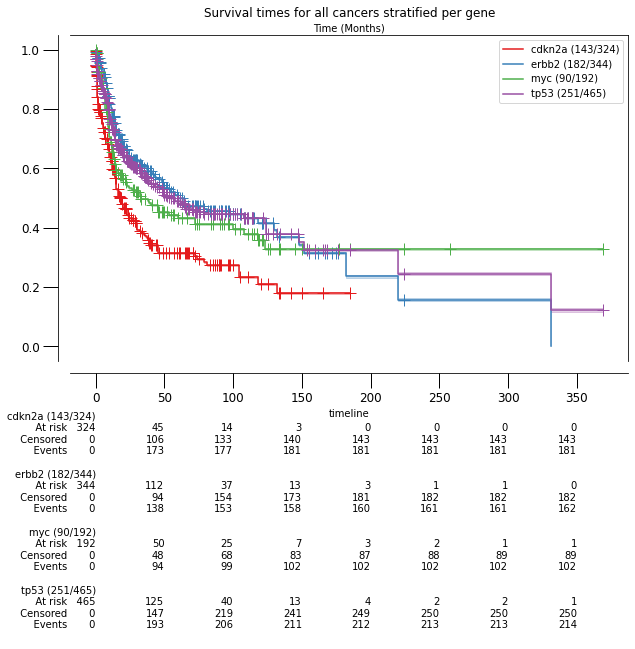

In [45]:
time = whole_dataset['info.followupMonths']
event = whole_dataset['info.death']
group = whole_dataset['group']
results = km.fit(time, event, group)

plt.figure(figsize=(15, 10)) 
km.plot(results, title="Survival times for all cancers stratified per gene")
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')  

plt.savefig('kaplan_meier_plot_genes.png', bbox_inches='tight')  
plt.show()

<Figure size 1080x720 with 0 Axes>

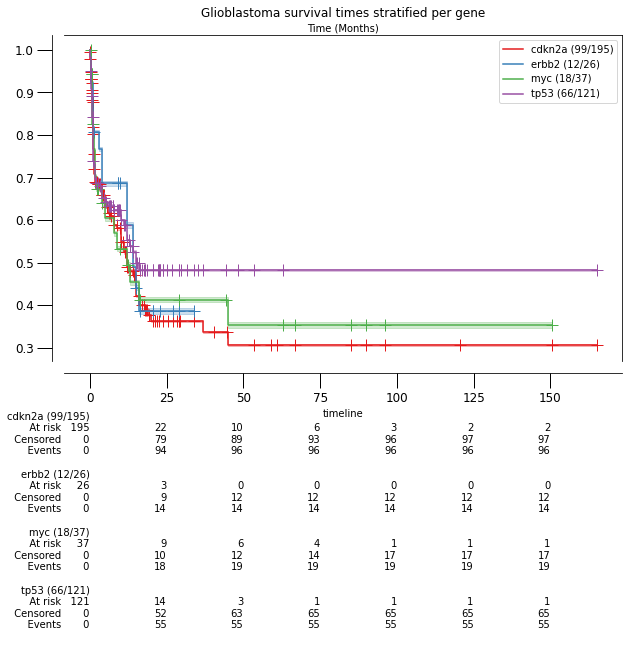

In [48]:
cancer = "Glioblastoma"

filtered_dataset = whole_dataset[whole_dataset['histologicalDiagnosis.label'] == cancer]


time = filtered_dataset['info.followupMonths']
event = filtered_dataset['info.death']
group = filtered_dataset['group']
results = km.fit(time, event, group)

plt.figure(figsize=(15, 10)) 
km.plot(results, title=(cancer+" survival times stratified per gene"))
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')  
plt.savefig('kaplan_meier_plot_genes_cancer.png', bbox_inches='tight')  
plt.show()

In [27]:
tp53["biosample_id"].value_counts()

pgxbs-kftva59y    1
pgxbs-kftvjhx6    1
pgxbs-kftvjhxi    1
pgxbs-kftvjhxf    1
pgxbs-kftvjhxd    1
                 ..
pgxbs-kftvhvyc    1
pgxbs-kftvhvzc    1
pgxbs-kftvhw2a    1
pgxbs-kftvhw9n    1
pgxbs-l08aie8g    1
Name: biosample_id, Length: 4568, dtype: int64

In [28]:
tp53["individual_id"].value_counts()

pgxind-kftx3k1s    2
pgxind-kftx3ihn    2
pgxind-kl8hk3wd    2
pgxind-kftx3p6w    2
pgxind-kl8hk4af    2
                  ..
pgxind-kftx3s49    1
pgxind-kftx3sqz    1
pgxind-kftx3pis    1
pgxind-kftx3nms    1
pgxind-l08aie8g    1
Name: individual_id, Length: 4556, dtype: int64

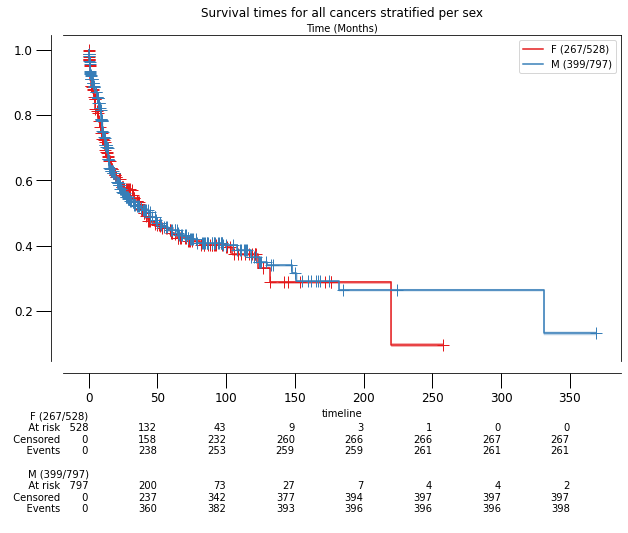

In [49]:
time = whole_dataset['info.followupMonths']
event = whole_dataset['info.death']
group = whole_dataset['sex']
results = km.fit(time, event, group)
km.plot(results, title="Survival times for all cancers stratified per sex")
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')  
plt.savefig('kaplan_meier_plot_sex.png', bbox_inches='tight')  
plt.show()

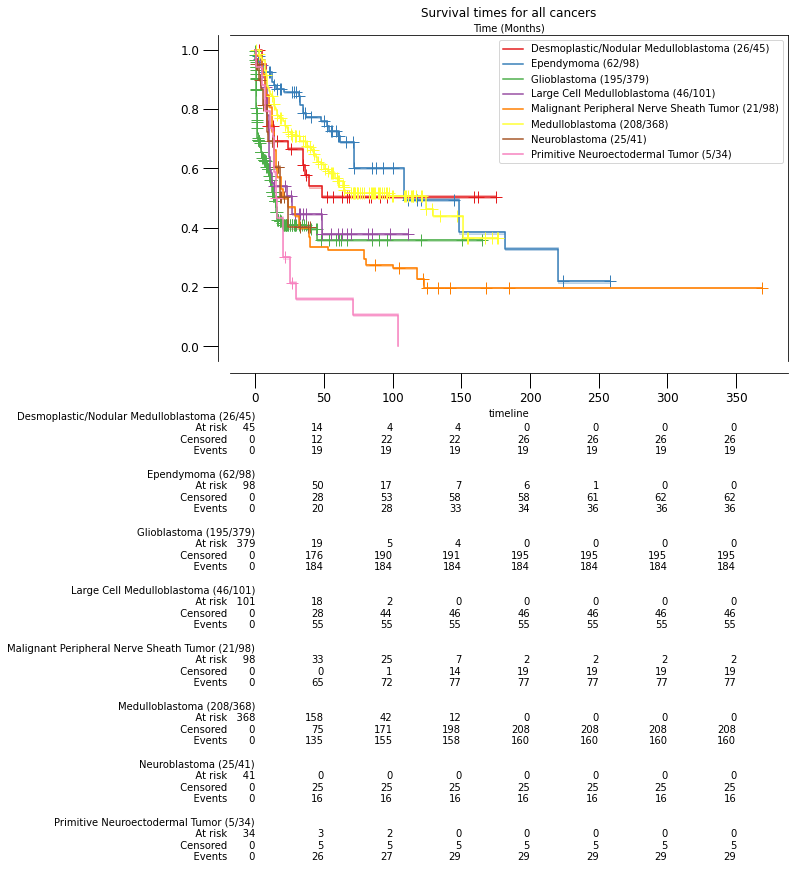

In [50]:
id_counts = whole_dataset['histologicalDiagnosis.label'].value_counts()
selected_ids = id_counts[id_counts > 30].index
filtered_dataset = whole_dataset[whole_dataset['histologicalDiagnosis.label'].isin(selected_ids)]


time = filtered_dataset['info.followupMonths']
event = filtered_dataset['info.death']
group = filtered_dataset['histologicalDiagnosis.label']
results = km.fit(time, event, group)
km.plot(results, title="Survival times for all cancers")
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')  
plt.savefig('kaplan_meier_plot_diagnoses.png', bbox_inches='tight')  
plt.show()

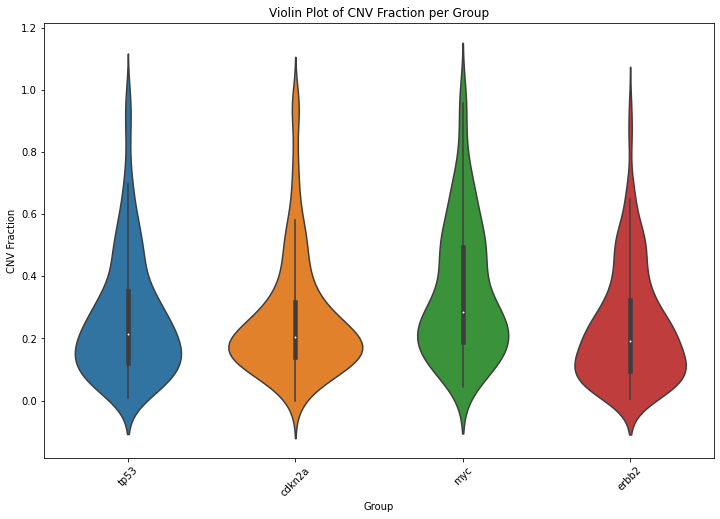

In [31]:
# Create a violin plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.violinplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset)

# Set plot labels and title
plt.xlabel('Group')
plt.ylabel('CNV Fraction')
plt.title('Violin Plot of CNV Fraction per Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig('violin_plot.png', bbox_inches='tight')  

# Show the plot
plt.show()

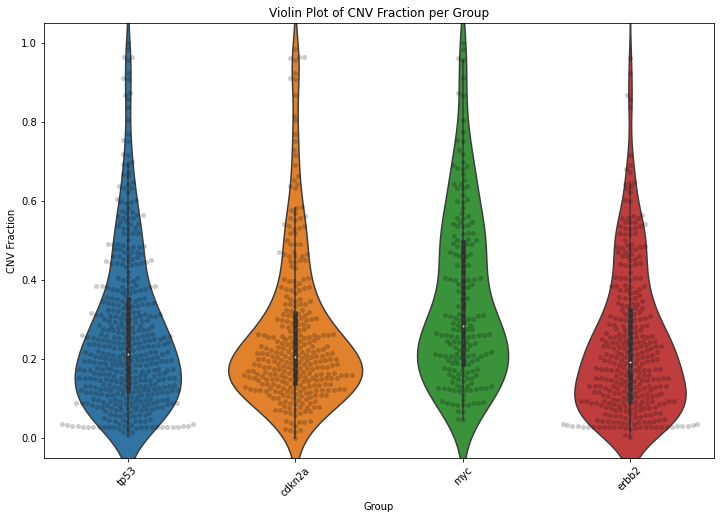

In [32]:
 # Create a violin plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
ax = sns.violinplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset)

# Add data points using a swarmplot
sns.swarmplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset, color='black', alpha=0.2)

# Set plot labels and title
plt.xlabel('Group')
plt.ylabel('CNV Fraction')
plt.title('Violin Plot of CNV Fraction per Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig('violin_plot_dots.png', bbox_inches='tight')  


# Show the plot
plt.show()

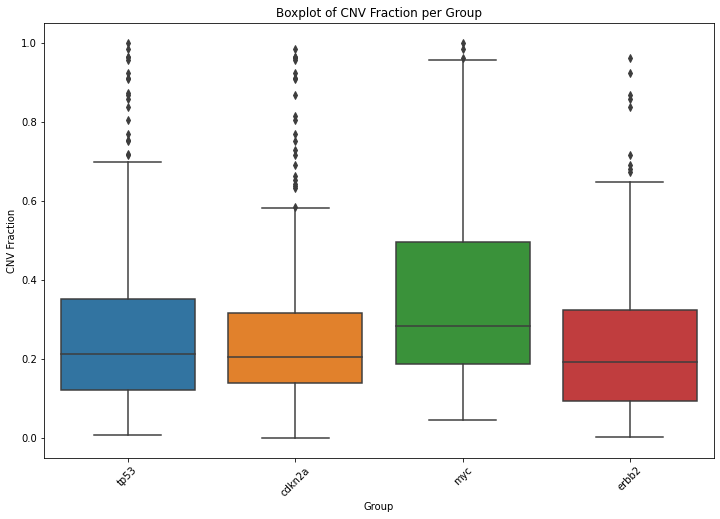

In [33]:

plt.figure(figsize=(12, 8)) 
sns.boxplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset)

plt.xlabel('Group')
plt.ylabel('CNV Fraction')
plt.title('Boxplot of CNV Fraction per Group')

plt.savefig('box_plot.png', bbox_inches='tight')  


plt.xticks(rotation=45)
plt.show()

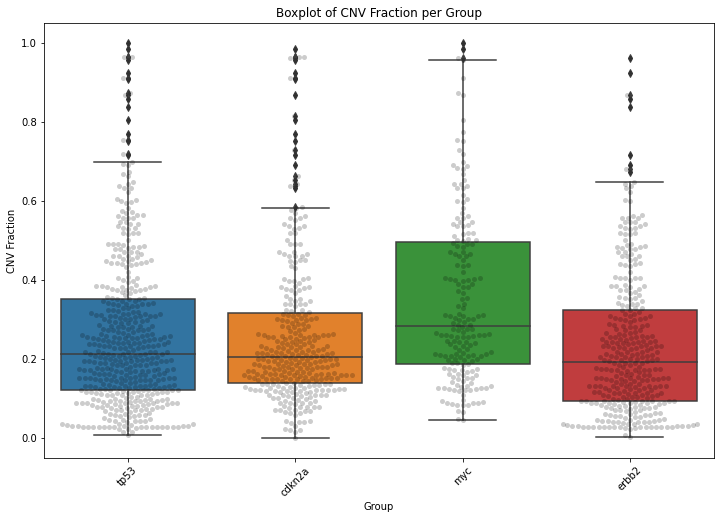

In [34]:
plt.figure(figsize=(12, 8)) 
ax = sns.boxplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset)
sns.swarmplot(x='group', y='info.cnvstatistics.cnvfraction', data=whole_dataset, color='black', alpha=0.2)

plt.xlabel('Group')
plt.ylabel('CNV Fraction')
plt.title('Boxplot of CNV Fraction per Group')

plt.savefig('box_plot_dots.png', bbox_inches='tight')  


plt.xticks(rotation=45)
plt.show()

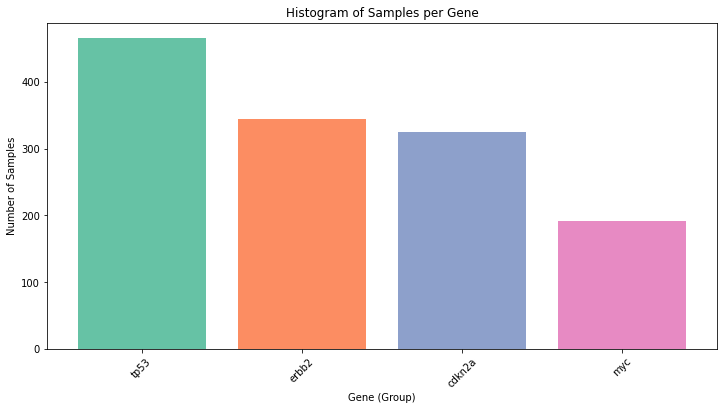

In [35]:
# Count the number of samples per gene (group)
gene_counts = whole_dataset['group'].value_counts()

# Create a color palette (adjust colors as needed)
colors = sns.color_palette("Set2", len(gene_counts))

# Create a histogram with colored bars
plt.figure(figsize=(12, 6))  # Adjust the size as needed
plt.bar(gene_counts.index, gene_counts.values, color=colors)

# Set plot labels and title
plt.xlabel('Gene (Group)')
plt.ylabel('Number of Samples')
plt.title('Histogram of Samples per Gene')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig('histogram_genes.png', bbox_inches='tight')  

# Show the plot
plt.show()


In [36]:
whole_dataset.head()

,info.followupMonths,info.death,group,histologicalDiagnosis.id,info.cnvstatistics.cnvfraction,sex,histologicalDiagnosis.label
0,19.0,0,tp53,NCIT:C3017,0.667,F,Ependymoma
1,18.0,0,tp53,NCIT:C3017,0.541,F,Ependymoma
2,11.0,0,tp53,NCIT:C3017,0.565,M,Ependymoma
3,85.0,0,tp53,NCIT:C3017,0.857,M,Ependymoma
4,10.0,0,tp53,NCIT:C3017,0.387,F,Ependymoma


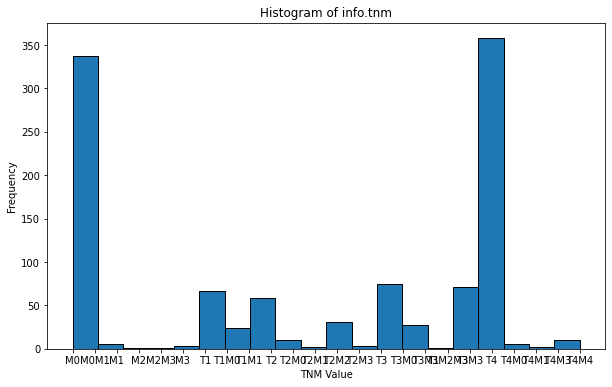

In [37]:
filtered_samples = samples.dropna(subset=['info.tnm'])

# Sort the 'info.tnm' values alphabetically
sorted_tnm_values = filtered_samples['info.tnm'].sort_values()

# Create a histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(sorted_tnm_values, bins=20, edgecolor='k')  # You can adjust the number of bins

# Set plot labels and title
plt.xlabel('TNM Value')
plt.ylabel('Frequency')
plt.title('Histogram of info.tnm')

# Show the plot
plt.show()

In [38]:
samples.head()

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,histologicalDiagnosis.id,histologicalDiagnosis.label,icdoMorphology.id,icdoMorphology.label,...,provenance.populations.0.type.label,provenance.populations.1.confidence,provenance.populations.1.description,provenance.populations.1.type.id,provenance.populations.1.type.label,info.cellLine,info.samplesource,info.seer,projectId,sex
0,5bab56c2727983b2e00abf78,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Ependymoma [4th ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
1,5bab56c3727983b2e00ac462,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [Left cerebral],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,5bab56c3727983b2e00ac463,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
3,5bab56c3727983b2e00ac464,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
4,5bab56c3727983b2e00ac465,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F


In [39]:
samples["individualAgeAtCollection"]

0        P1Y
1        P5Y
2       P33Y
3       P17Y
4       P32Y
        ... 
2555     P1Y
2556     P1Y
2557    P46Y
2558     P1Y
2559    P61Y
Name: individualAgeAtCollection, Length: 2560, dtype: object

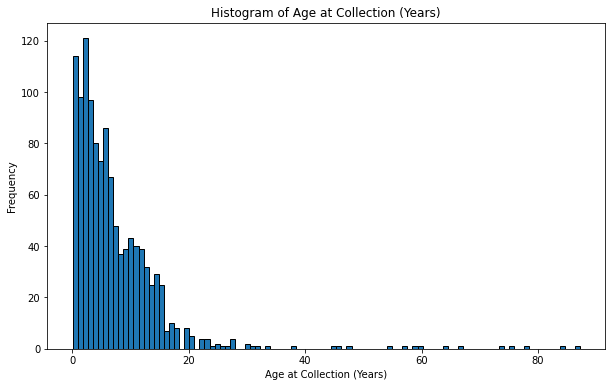

In [40]:
new_samples_df = samples.copy()

# Extract the numeric values from the 'individualAgeAtCollection' column and convert to years
age_values = samples['individualAgeAtCollection'].str.extract(r'(\d+)Y(\d+)M')
age_in_months = pd.to_numeric(age_values[0]) * 12 + pd.to_numeric(age_values[1])
new_samples_df['individualAgeAtCollection'] = age_in_months / 12  # Convert to years

# Create a histogram of the 'individualAgeAtCollection' column in years
plt.figure(figsize=(10, 6))
plt.hist(new_samples_df['individualAgeAtCollection'], bins=100, edgecolor='k')
plt.xlabel('Age at Collection (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Age at Collection (Years)')

plt.savefig('histogram_age.png', bbox_inches='tight')  


plt.show()
